Step 1: Load Libraries and Data

In [22]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Import libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
sns.set_theme()
sns.set_style("white")



In [23]:
# File paths
tsv_file = '.\\subject-Claudius.tsv'
log_file = '.\\subject-Claudius_log.txt'
csv_file = '.\\subject-Claudius.csv'

# Load the data
data_tsv = pd.read_csv(tsv_file, sep='\t')
data_csv = pd.read_csv(csv_file)

# Display initial rows of data to understand its structure
data_tsv.head(), data_csv.head()


(      CNT        TIME    TIME_TICK    FPOGX    FPOGY       FPOGS    FPOGD  \
 0  358570  3476.23389  59187941128  0.41395  0.48736  3476.16919  0.06470   
 1  358571  3476.25000  59188101958  0.41323  0.48781  3476.16919  0.08081   
 2  358572  3476.26611  59188263545  0.41192  0.48575  3476.16919  0.09692   
 3  358573  3476.28223  59188424318  0.41095  0.48420  3476.16919  0.11304   
 4  358574  3476.29858  59188589634  0.41259  0.48831  3476.16919  0.12939   
 
    FPOGID  FPOGV    LPOGX  ...  LPUPILV    REYEX    REYEY    REYEZ  RPUPILD  \
 0    8038      1  0.40308  ...        1  0.03415  0.01563  0.64326  0.00566   
 1    8038      1  0.41098  ...        1  0.03415  0.01563  0.64326  0.00563   
 2    8038      1  0.39483  ...        1  0.03415  0.01563  0.64326  0.00565   
 3    8038      1  0.39483  ...        1  0.03405  0.01577  0.64506  0.00563   
 4    8038      1  0.40415  ...        1  0.03405  0.01577  0.64506  0.00556   
 
    RPUPILV       CX       CY  CS         USER  

Step 2: Load and Parse Log Data

In [17]:
# Load log data
with open(log_file, 'r') as file:
    log_data = file.readlines()

# Parse log data
logs = []
for line in log_data:
    if "start_trial" in line or "stop_trial" in line or "coordinates" in line:
        logs.append(line.strip())
        
# Create DataFrame for logs
log_df = pd.DataFrame(logs, columns=['log'])

# Function to extract timestamps and other details from logs
def extract_log_details(log_df):
    events = []
    for index, row in log_df.iterrows():
        if "start_trial" in row['log']:
            events.append({'timestamp': index, 'event': 'start_trial'})
        elif "stop_trial" in row['log']:
            events.append({'timestamp': index, 'event': 'stop_trial'})
        elif "coordinates" in row['log']:
            coords = row['log'].split(':')[1].strip()
            events.append({'timestamp': index, 'event': 'coordinates', 'coords': coords})
    return pd.DataFrame(events)

# Extracting log details
log_events = extract_log_details(log_df)
log_events.head()


,timestamp,event,coords
0,0,start_trial,NaN
1,1,coordinates,"(277,-160, -277, 160)"
2,2,stop_trial,NaN
3,3,start_trial,NaN
4,4,coordinates,"(277,-160, -277, 160)"


Step 3: Plot Time Against X-Position with Vertical Lines for Each User Log/Trigger

KeyError: 'TIME'

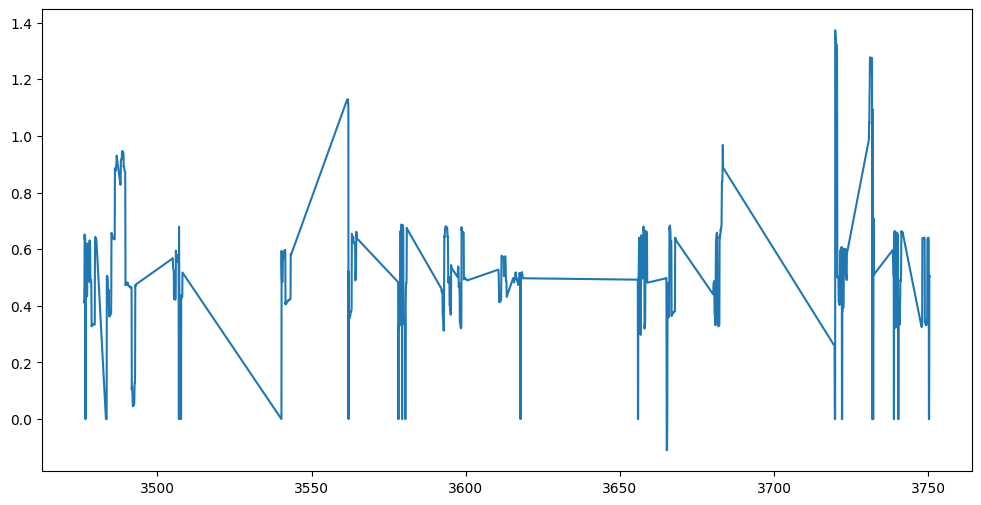

In [21]:
def plot_time_against_x(data_tsv, log_events):
    plt.figure(figsize=(12, 6))

    # Correcting column name to 'TIME' (as it appears in data_tsv.head())
    plt.plot(data_tsv['TIME'], data_tsv['FPOGX'], label='X-Position')  # Also assuming 'FPOGX' is the x-position column

    for _, event in log_events.iterrows():
        if event['event'] == 'start_trial' or event['event'] == 'stop_trial':
            # Accessing the correct timestamp column
            plt.axvline(x=event['TIME'], color='r' if event['event'] == 'start_trial' else 'g', linestyle='--')

    plt.xlabel('Time')
    plt.ylabel('X-Position')
    plt.title('Time Against X-Position with Vertical Lines for User Logs/Triggers')
    plt.legend()
    plt.show()

plot_time_against_x(data_tsv, log_events) 


In [20]:
#def plot_time_against_x(data_tsv, log_events):
plt.figure(figsize=(12, 6))
plt.plot(data_tsv['TIME'], data_tsv['x_position'], label='X-Position')
    
for _, event in log_events.iterrows():
    if event['event'] == 'start_trial' or event['event'] == 'stop_trial':
        plt.axvline(x=event['timestamp'], color='r' if event['event'] == 'start_trial' else 'g', linestyle='--')
    
plt.xlabel('Time')
plt.ylabel('X-Position')
plt.title('Time Against X-Position with Vertical Lines for Each User Log/Trigger')
plt.legend()
plt.show()

#plot_time_against_x(data_tsv, log_events)


KeyError: 'time'

<Figure size 1200x600 with 0 Axes>

Step 4: Plot X Against Y

In [11]:
def plot_x_against_y(data_tsv):
    plt.figure(figsize=(6, 6))
    plt.scatter(data_tsv['x_position'], data_tsv['y_position'], s=1)
    plt.xlabel('X-Position')
    plt.ylabel('Y-Position')
    plt.title('X Against Y')
    plt.show()

plot_x_against_y(data_tsv)


KeyError: 'x_position'

<Figure size 600x600 with 0 Axes>

Step 5: Count All Logs/Triggers and Confirm All Trials Exist with Expected Temporal Distances

In [12]:
def count_logs_and_check_trials(log_events):
    start_trials = log_events[log_events['event'] == 'start_trial'].shape[0]
    stop_trials = log_events[log_events['event'] == 'stop_trial'].shape[0]
    
    print(f"Number of start trials: {start_trials}")
    print(f"Number of stop trials: {stop_trials}")
    
    # Check if the number of start and stop trials match
    if start_trials == stop_trials:
        print("All trials have corresponding start and stop logs.")
    else:
        print("Mismatch in the number of start and stop logs.")

count_logs_and_check_trials(log_events)


Number of start trials: 24
Number of stop trials: 24
All trials have corresponding start and stop logs.


Step 6: Check for Balancing/Randomization Errors

In [13]:
def check_balancing_errors(log_events):
    coordinates = log_events[log_events['event'] == 'coordinates']['coords'].value_counts()
    print("Coordinates frequency:")
    print(coordinates)
    
    # Here we could add more detailed checks for balancing/randomization if needed

check_balancing_errors(log_events)


Coordinates frequency:
coords
(277,-160, -277, 160)    2
(0,320, 0, -320)         2
(-160,-277, 160, 277)    2
(160,-277, -160, 277)    2
(-277,-160, 277, 160)    2
(-320,0, 320, 0)         2
(0,-320, 0, 320)         2
(160,277, -160, -277)    2
(320,0, -320, 0)         2
(277,160, -277, -160)    2
(-160,277, 160, -277)    2
(-277,160, 277, -160)    2
Name: count, dtype: int64


Step 7: Calculate Accuracy/Precision while Gaze is on a Fixation-Cross

In [14]:
def calculate_accuracy_precision(data_tsv, log_events):
    fixation_cross_coords = (0, 0)  # Assuming fixation cross is at the center
    
    # Filter data for fixation events
    fixation_data = data_tsv[data_tsv['event'] == 'fixation']
    fixation_distances = np.sqrt((fixation_data['x_position'] - fixation_cross_coords[0])**2 + 
                                 (fixation_data['y_position'] - fixation_cross_coords[1])**2)
    
    accuracy = fixation_distances.mean()
    precision = fixation_distances.std()
    
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")

calculate_accuracy_precision(data_tsv, log_events)


KeyError: 'event'